In [35]:

!pip install pytesseract

# Install Pillow (needed for image handling)
!pip install Pillow

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\\Program Files\\Tesseract-OCR\\tesseract.exe"



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import cv2
import numpy as np
import pytesseract
import os

In [37]:
def process_image(img):
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    noise_free = cv2.fastNlMeansDenoising(gray_image)
    binary_thresh = cv2.threshold(noise_free, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return binary_thresh

In [38]:
def text_regions(image_data):
    detected_data = pytesseract.image_to_data(image_data, output_type=pytesseract.Output.DICT)
    return detected_data

In [39]:
def mark_text_regions(img, detected_boxes):
    output_img = img.copy()
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            (x, y, width, height) = (detected_boxes['left'][i], detected_boxes['top'][i], detected_boxes['width'][i], detected_boxes['height'][i])
            cv2.rectangle(output_img, (x, y), (x + width, y + height), (0, 255, 0), 2)
    return output_img

In [40]:
def extract_text(detected_boxes):
    text_content = []
    num_boxes = len(detected_boxes['level'])
    for i in range(num_boxes):
        if int(detected_boxes['conf'][i]) > 60:
            text_content.append(detected_boxes['text'][i])
    return ' '.join(text_content)


Original Image:


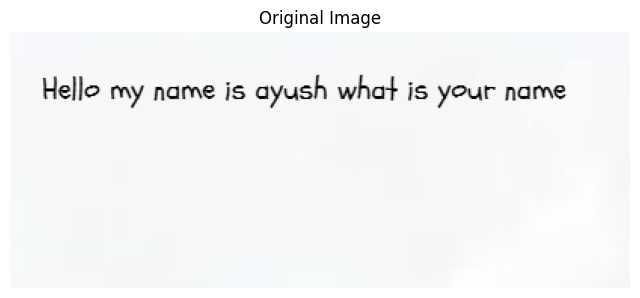


Image with Text Detection Regions:


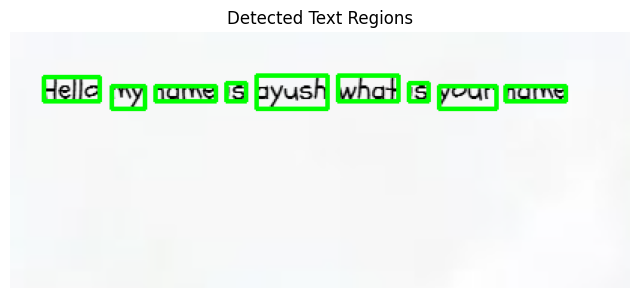


Detected Text:
Hello may name 1s ayush whet is your name


In [41]:

import matplotlib.pyplot as plt

def show_image(img, title="Image"):
    # Convert BGR (OpenCV) → RGB (matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

img_path = "img3.png"
image_loaded = cv2.imread(img_path)

# Check if image was successfully loaded
if image_loaded is None:
    print(f"Error: Unable to read the image file: {img_path}")
else:
    # Display original image
    print("\nOriginal Image:")
    show_image(image_loaded, "Original Image")

    # Preprocess image
    preprocessed_image = process_image(image_loaded)

    # Detect text regions
    text_boxes = text_regions(preprocessed_image)

    # Draw bounding boxes on the original image
    image_with_boxes = mark_text_regions(image_loaded.copy(), text_boxes)

    # Display the image with detected text regions
    print("\nImage with Text Detection Regions:")
    show_image(image_with_boxes, "Detected Text Regions")

    # Extract and print detected text
    extracted_text = extract_text(text_boxes)
    print("\nDetected Text:")
    print(extracted_text)
